This notebook is based on [DLA Seminar](https://github.com/markovka17/dla/blob/2022/week06/seminar.ipynb)

To work with audio in `PyTorch`, it will be useful to install additional library: `torchaudio`. It contains a lot of useful transforms, digital-signal-processing functions, pre-trained models, and many more.

Similar to `torchvision` make sure you install proper version of `torchaudio` that is **compatible** with your `torch` library version

In [ ]:
!pip install torchaudio # include library version via == if pip does not do it properly itself

In [4]:
# Some imports

# computation stuff
import torch
import torchaudio
import numpy as np

# plotting stuff
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina' # makes the quality higher

import seaborn as sns
sns.set_style("whitegrid") # improves the quality of matplotlib images and adds grid

# Raw Waveform vs Spectrogram

In [5]:
from IPython import display

from torchaudio.utils import download_asset

# some example utterances
SAMPLE_SPEECH_PATH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_NOISE_PATH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-rm1-babb-mc01-stu-clo.wav")

To load the audio, we can use `torchaudio.load`. Note that sample rate is encoded inside the file itself.

In [6]:
speech, sr = torchaudio.load(SAMPLE_SPEECH_PATH)
print(f"Audio shape: {speech.shape}, Sample rate: {sr}") # sample rate is encoded inside the file
display.Audio(speech, rate=sr)

Audio shape: torch.Size([1, 54400]), Sample rate: 16000


One in the first dimension means that we have only 1 audio channel: mono audio. If we had stereo audio, it would be 2.

To get the length of audio in seconds we use the definition of sample rate:

In [7]:
speech_length_in_sec = speech.shape[-1] / sr
print(f"Speech length in sec: {speech_length_in_sec}")

Speech length in sec: 3.4


We can visualize the waveform:

Text(0, 0.5, 'Amplitude')

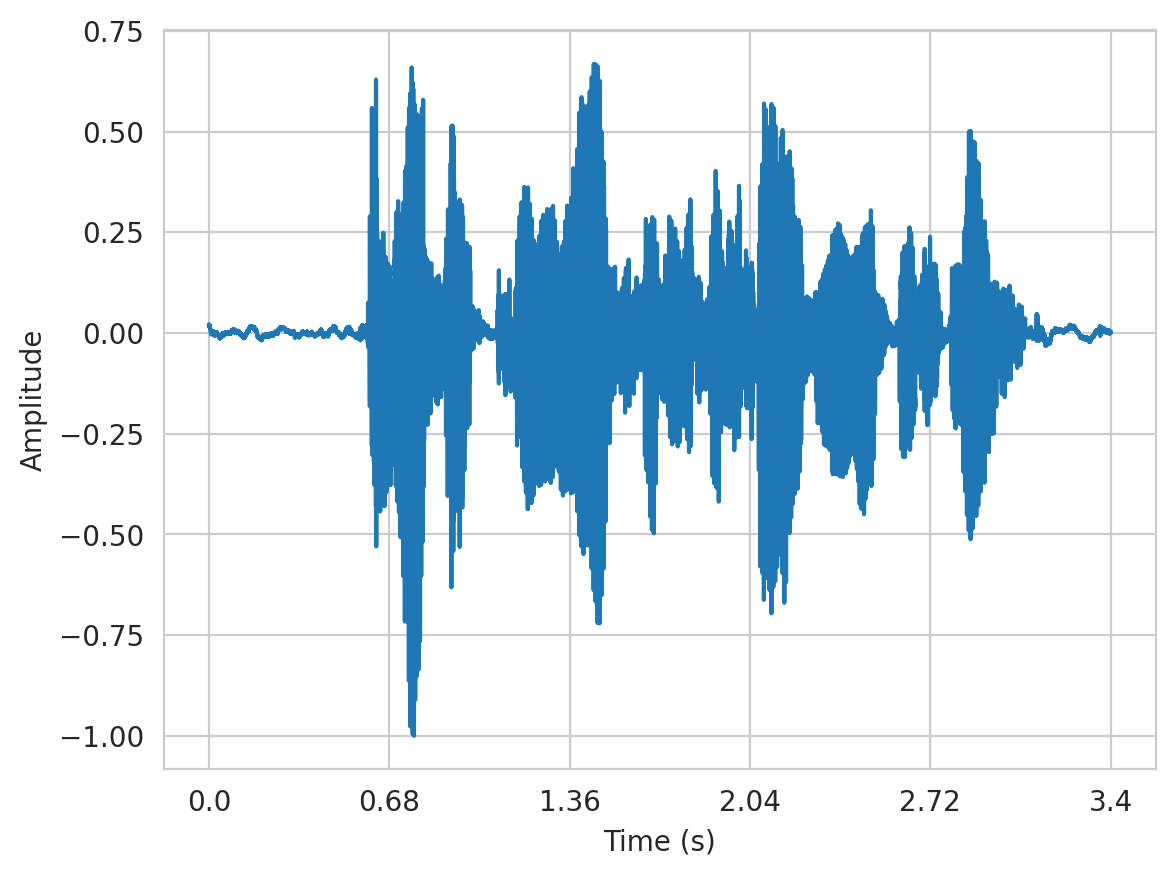

In [8]:
plt.plot(speech[0])

xticks = np.linspace(0, speech.shape[-1], num=6)
xtext = np.round(xticks / sr, 2)
plt.xticks(xticks, xtext)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Frequency domain may help us to distinguish what happens in the audio (whether it is speech or noise, for example)

In [9]:
N = 16000
f1 = 500 # Hz

f2 = 2000 # Hz
signal1 = torch.sin(f1 * torch.arange(N) / sr)
signal2 = torch.sin(f2 * torch.arange(N) / sr)

In [10]:
display.Audio(signal1, rate=sr)

In [11]:
display.Audio(signal2, rate=sr)

In [12]:
signal = (signal1 + signal2) / 2
display.Audio(signal, rate=sr)

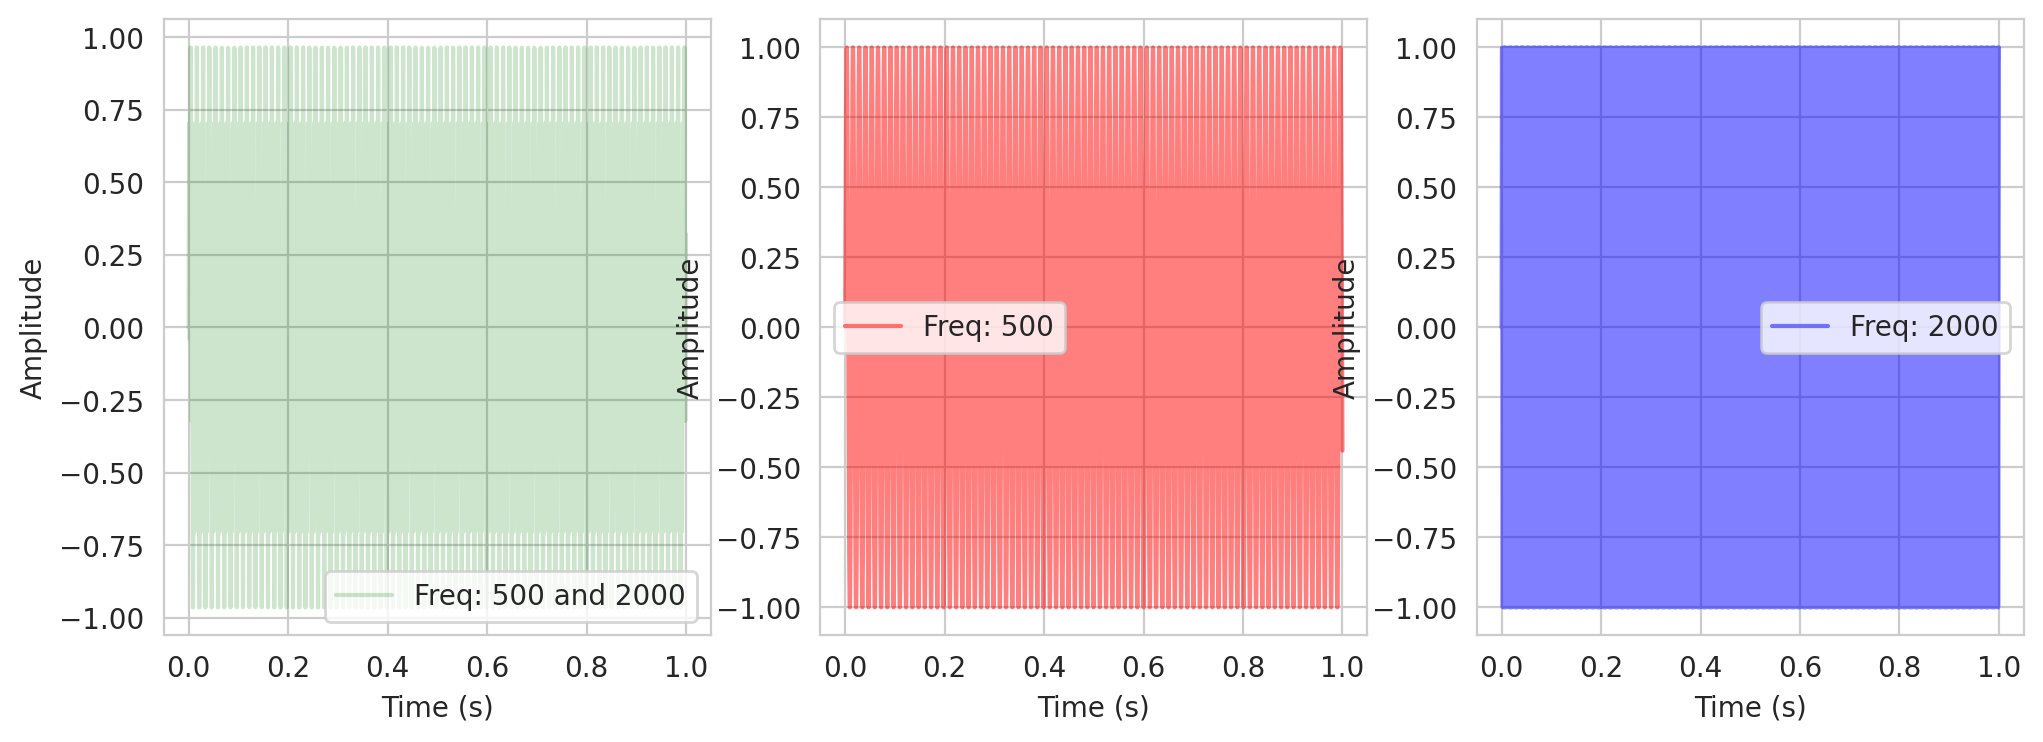

In [13]:
fix, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(signal, label=f"Freq: {f1} and {f2}", color="green", alpha=0.2)
axes[1].plot(signal1, label=f"Freq: {f1}", color="red", alpha=0.5)
axes[2].plot(signal2, label=f"Freq: {f2}", color="blue", alpha=0.5)
xticks = np.linspace(0, signal.shape[-1], num=6)
xtext = np.round(xticks / sr, 2)
axes[0].set_xticks(xticks, xtext)
axes[1].set_xticks(xticks, xtext)
axes[2].set_xticks(xticks, xtext)

axes[0].set_xlabel("Time (s)")
axes[1].set_xlabel("Time (s)")
axes[2].set_xlabel("Time (s)")

axes[0].set_ylabel("Amplitude")
axes[1].set_ylabel("Amplitude")
axes[2].set_ylabel("Amplitude")

axes[0].legend()
axes[1].legend()
axes[2].legend()

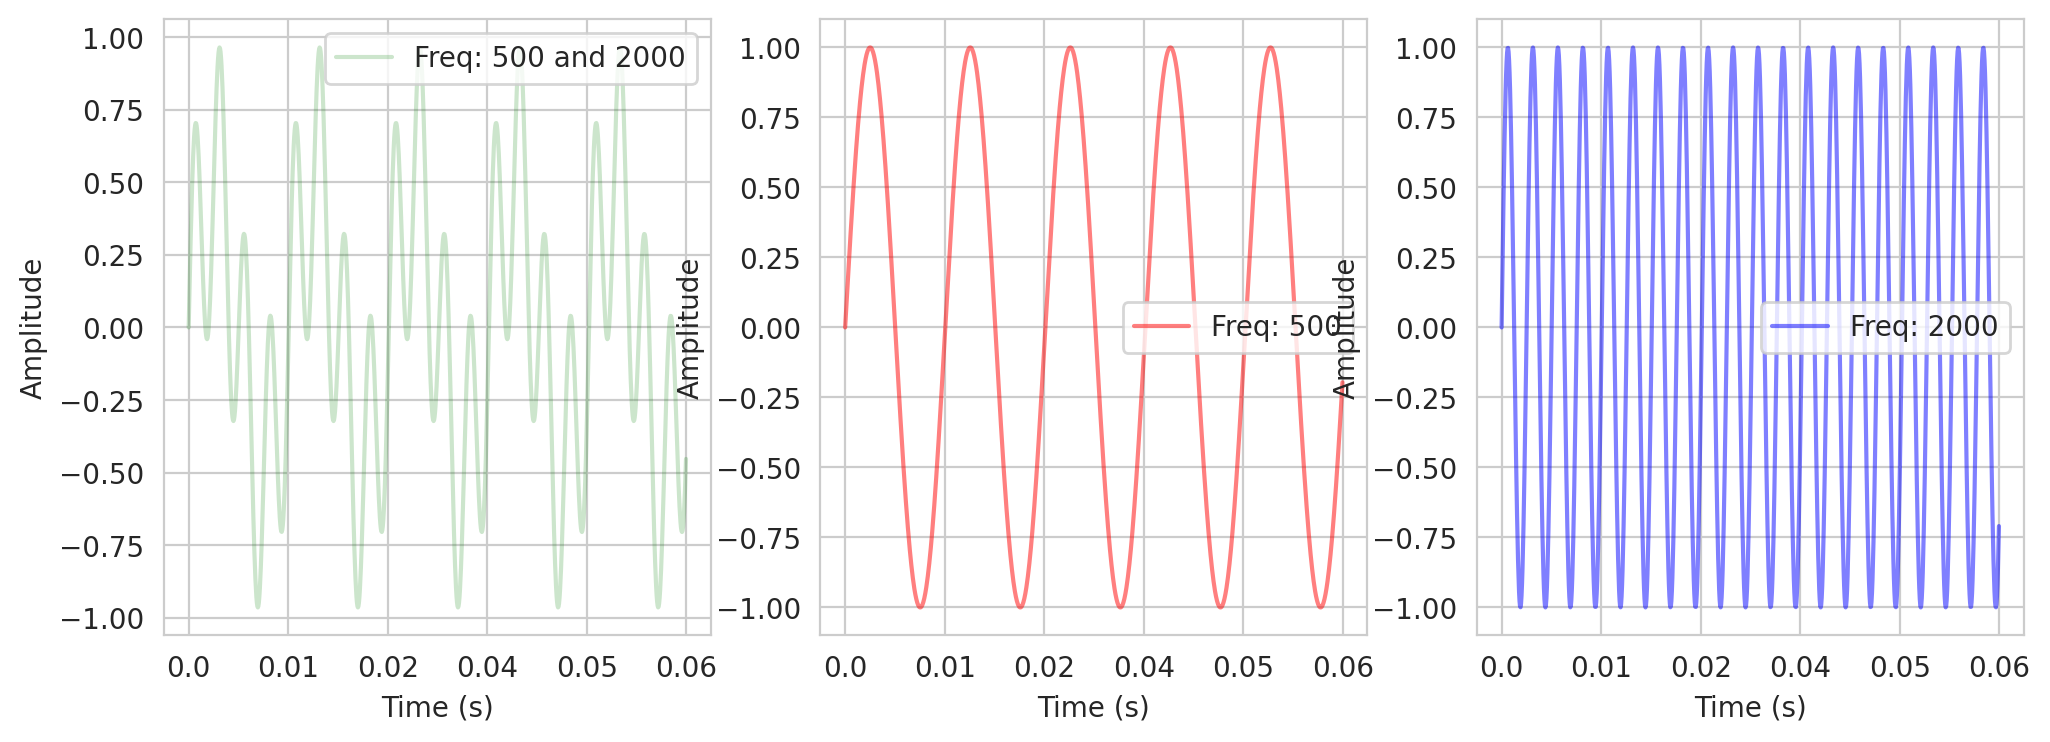

In [14]:
fix, axes = plt.subplots(1, 3, figsize=(12, 4))

N2=1000

axes[0].plot(signal[:N2], label=f"Freq: {f1} and {f2}", color="green", alpha=0.2)
axes[1].plot(signal1[:N2], label=f"Freq: {f1}", color="red", alpha=0.5)
axes[2].plot(signal2[:N2], label=f"Freq: {f2}", color="blue", alpha=0.5)
xticks = np.linspace(0, N2, num=6)
xtext = np.round(xticks / sr, 2)
axes[0].set_xticks(xticks, xtext)
axes[1].set_xticks(xticks, xtext)
axes[2].set_xticks(xticks, xtext)

axes[0].set_xlabel("Time (s)")
axes[1].set_xlabel("Time (s)")
axes[2].set_xlabel("Time (s)")

axes[0].set_ylabel("Amplitude")
axes[1].set_ylabel("Amplitude")
axes[2].set_ylabel("Amplitude")

axes[0].legend()
axes[1].legend()
axes[2].legend()

To get the same signal in frequency domain, we can use `torch.fft.fft` that calculates Fast Fourier Transform (Fast version of Discrete Fourier Transform)

Text(0, 0.5, 'Magnitude')

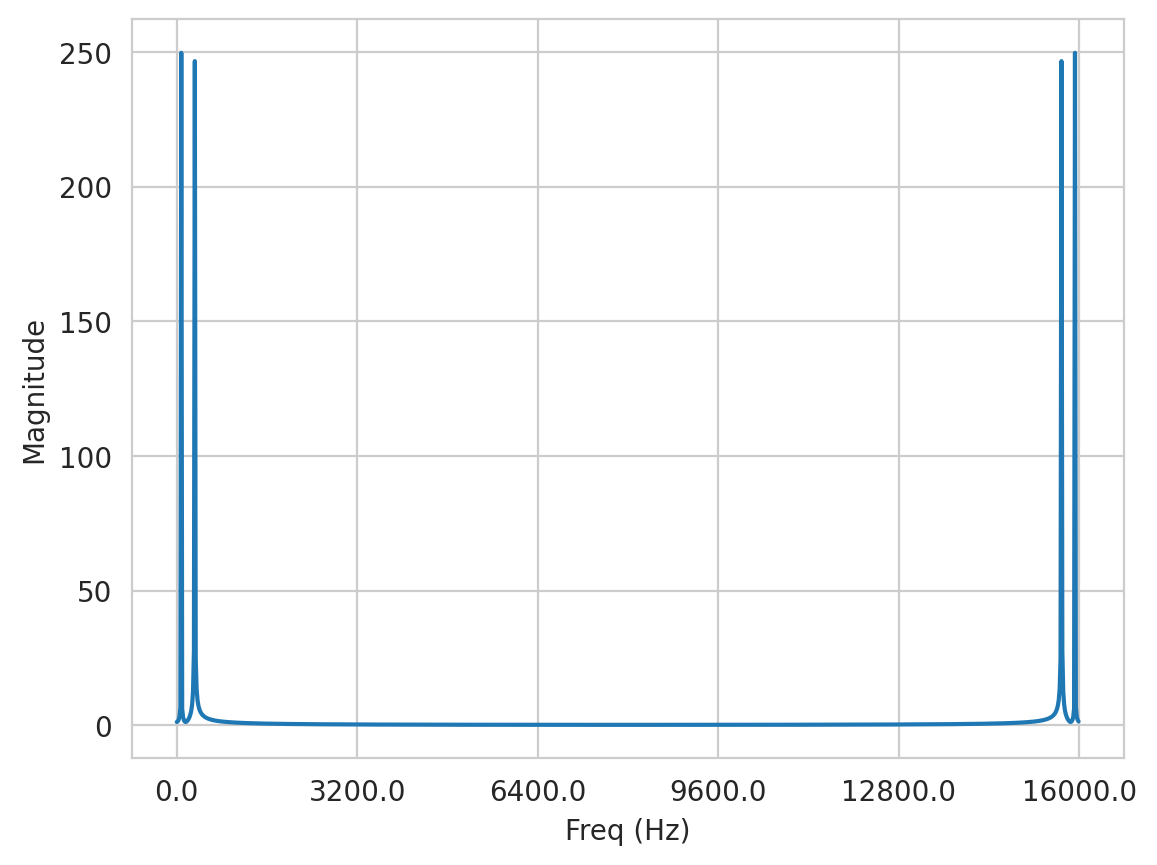

In [15]:
N3 = 1000

freq_domain = torch.fft.fft(signal[:N3])

xticks = np.linspace(0, signal[:N3].shape[-1], num=6)
xtext = xticks * sr / signal[:N3].shape[-1]
plt.xticks(xticks, xtext)

plt.plot(freq_domain.abs())
plt.xlabel("Freq (Hz)")
plt.ylabel("Magnitude")

Indeed, there are 2 peaks and our signal contained 2 sinuses with 2 frequencies

Now let's look at the noisy case

In [16]:
white_noise = torch.randn_like(signal)
white_noise = white_noise / white_noise.abs().max()
display.Audio(white_noise, rate=sr)

In [17]:
noisy_signal = signal + 0.3 * white_noise

display.Audio(noisy_signal, rate=sr)

We can clearly hear the noise, but if we look at the visualization, it would be hard to see it

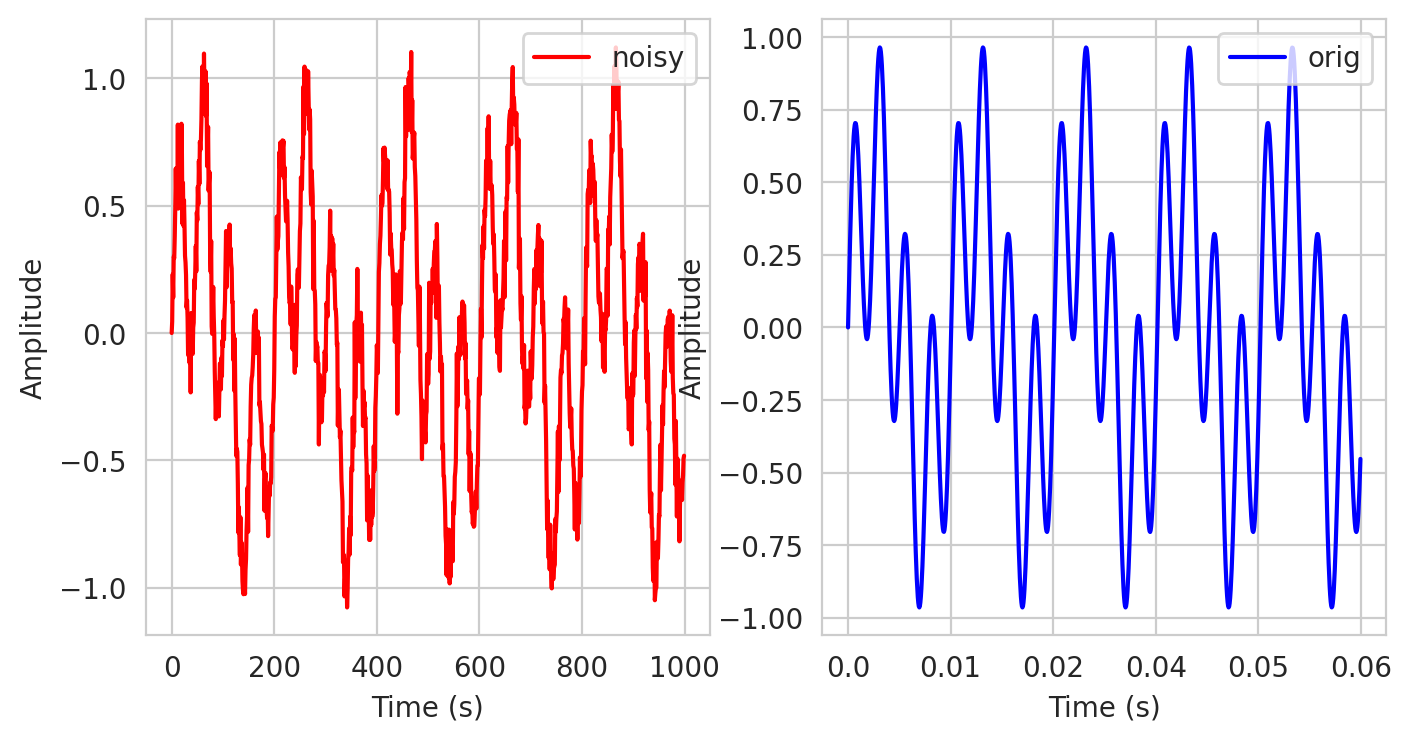

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].plot(noisy_signal[:N2], color="red", label="noisy")
axes[1].plot(signal[:N2], color="blue", label="orig")

xticks = np.linspace(0, noisy_signal[:N2].shape[-1], num=6)
xtext = np.round(xticks / sr, 2)
plt.xticks(xticks, xtext)

axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Amplitude")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Amplitude")
axes[0].legend()
axes[1].legend()

But in the Frequency domain it will be much easier:

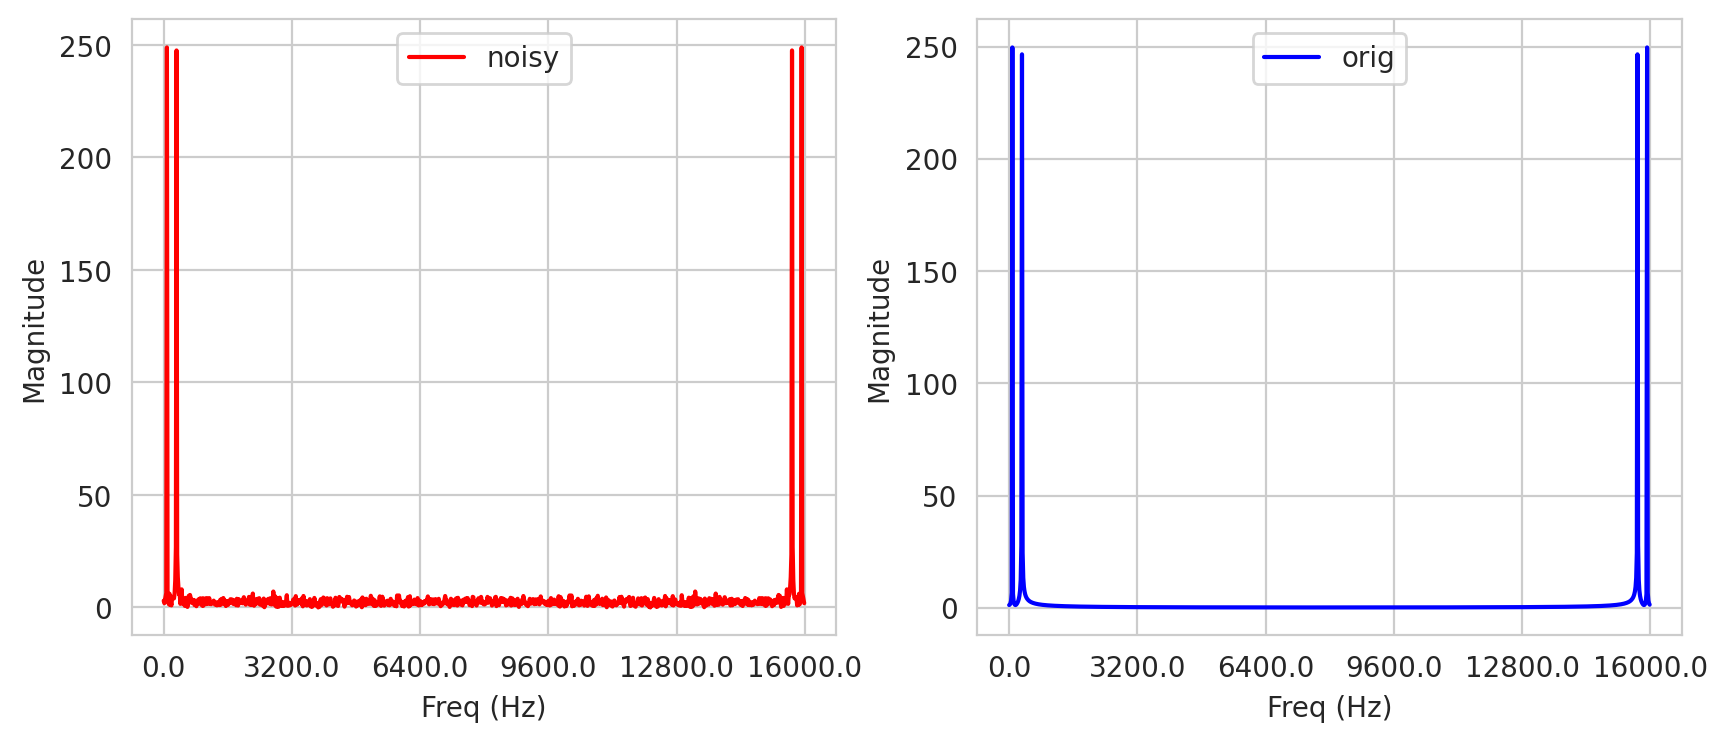

In [19]:
N3 = 1000

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

freq_domain = torch.fft.fft(noisy_signal[:N3])
axes[0].plot(freq_domain.abs(), color="red", label="noisy")

freq_domain = torch.fft.fft(signal[:N3])
axes[1].plot(freq_domain.abs(), color="blue", label="orig")


xticks = np.linspace(0, signal[:N3].shape[-1], num=6)
xtext = np.round(xticks * sr / signal[:N3].shape[-1], 1)
axes[0].set_xticks(xticks, xtext)
axes[1].set_xticks(xticks, xtext)

axes[0].set_xlabel("Freq (Hz)")
axes[0].set_ylabel("Magnitude")
axes[1].set_xlabel("Freq (Hz)")
axes[1].set_ylabel("Magnitude")
axes[0].legend()
axes[1].legend()

We see that apart from 2 peaks there are a lot of frequencies with small magnitude. Their across the full spectra so we can say that is is white noise.

---

Note that for 3.4 seconds of audio with 16kHz sampling rate we need 54400 samples, which is a lot. Also we can't see any frequency information from this visualization. 

That's why Time-Frequency Transforms are useful. The basic one is Short-Time-Fourier-Transform. In `torchaudio`, it is `torchaudio.transforms.Spectrogram`.

In [20]:
STFT_CONFIG = {
    "n_fft": 512,
    "win_length": 512,
    "hop_length": 256,
    "power": None,
    "normalized": False,
}

STFT = torchaudio.transforms.Spectrogram(**STFT_CONFIG)

In [21]:
stft_speech = STFT(speech)
print(stft_speech.shape)
print(stft_speech.dtype)

torch.Size([1, 257, 213])
torch.complex64


Originally, STFT returns complex values. However, they are hard to interpret by humans. Also working with complex values is not simple. Instead of working with complex STFT, many models use Magnitude Spectrogram (often referred to as Spectrogram) that is equal to the element-wise module of the complex values. Phase (complex argument) is often ignored due to its complicated structure (see visualization)

In [22]:
magnitude = stft_speech.abs() # also could be calculated via torchaudio if we used power=2 in config
phase = stft_speech.angle()

print(magnitude.shape)
print(phase.shape)

torch.Size([1, 257, 213])
torch.Size([1, 257, 213])


Text(0, 0.5, 'Freq (Hz)')

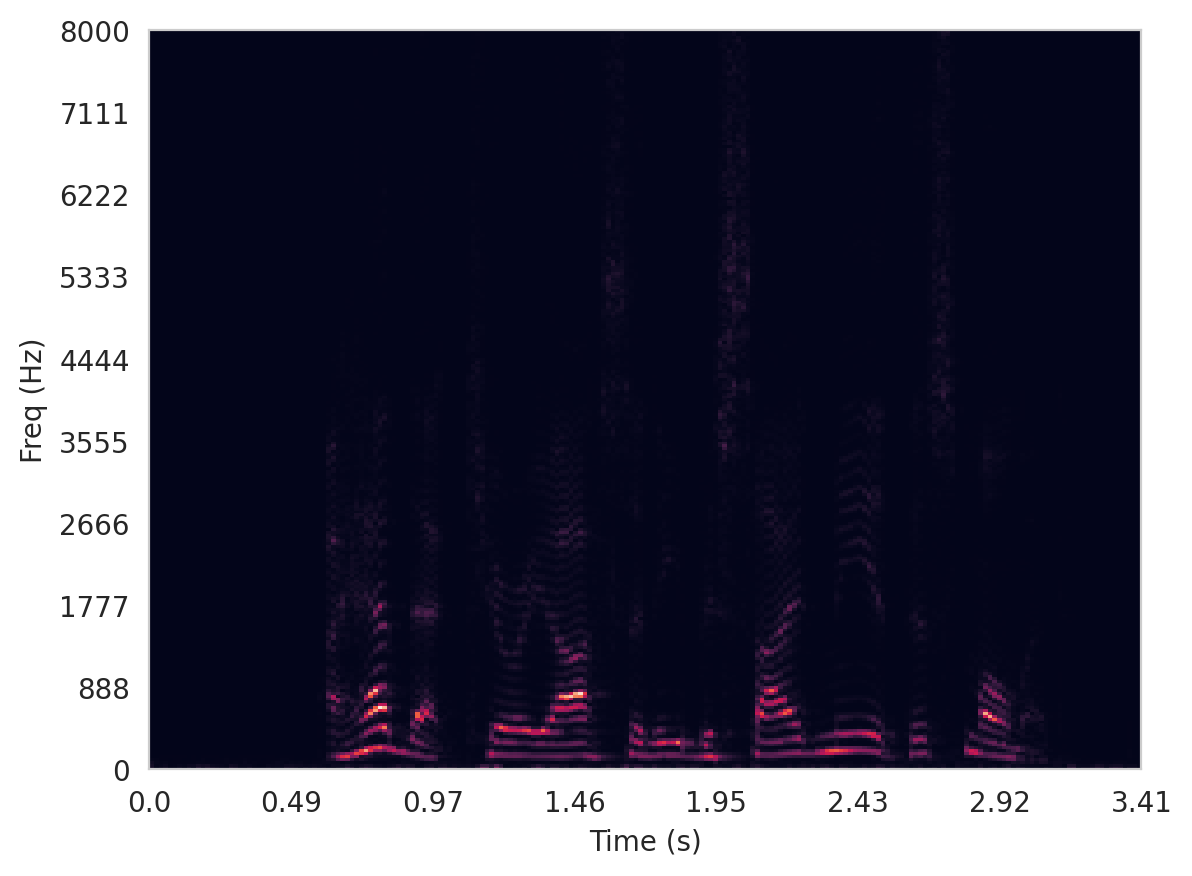

In [23]:
plt.pcolormesh(magnitude[0])
yticks = np.linspace(0, magnitude.shape[-2], num=10)
ytext = sr / 2 / magnitude.shape[-2] * yticks
ytext = ytext.astype(int)
plt.yticks(yticks, ytext)

xticks = np.linspace(0, magnitude.shape[-1], num=8)
xtext = xticks * STFT_CONFIG["hop_length"] / sr
xtext = xtext.round(2)
plt.xticks(xticks, xtext)

plt.xlabel("Time (s)")
plt.ylabel("Freq (Hz)")

Text(0, 0.5, 'Freq (Hz)')

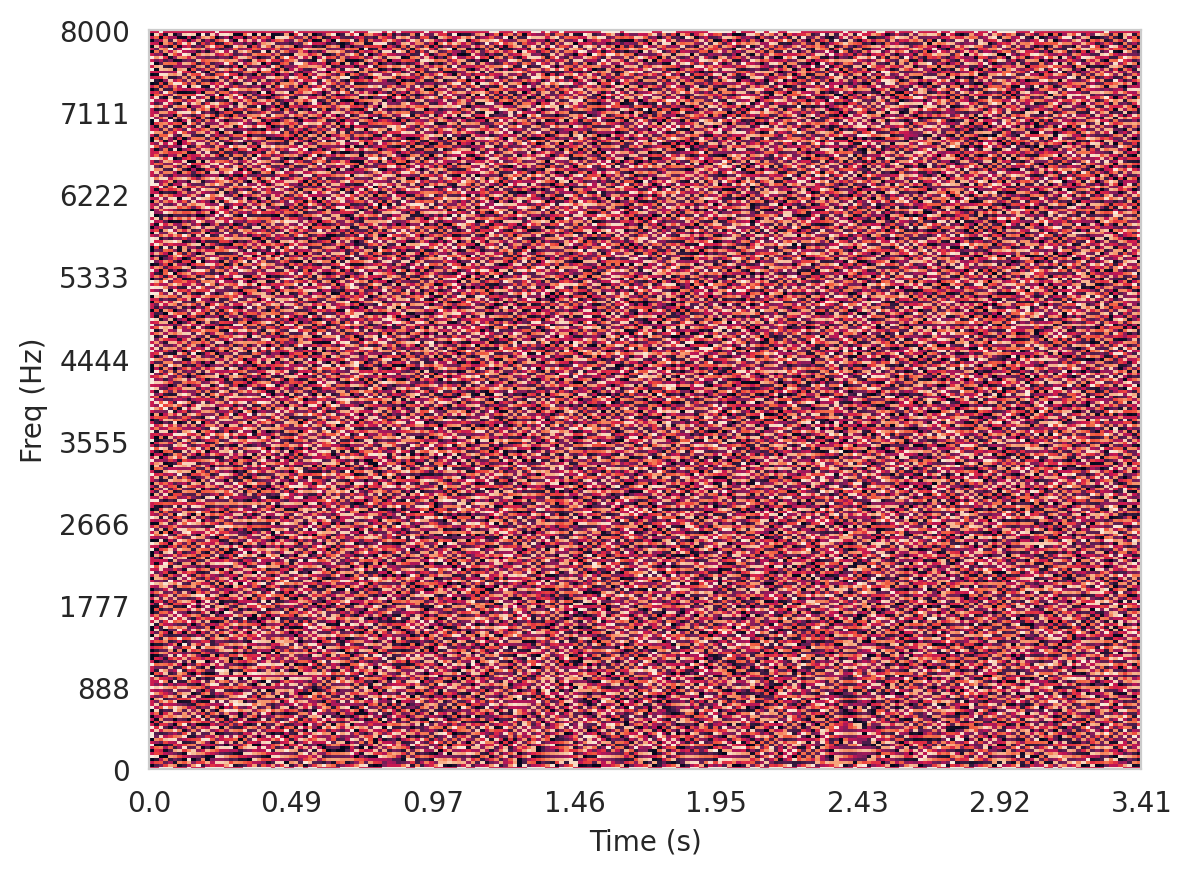

In [24]:
plt.pcolormesh(phase[0])
yticks = np.linspace(0, phase.shape[-2], num=10)
ytext = sr / 2 / phase.shape[-2] * yticks
ytext = ytext.astype(int)
plt.yticks(yticks, ytext)

xticks = np.linspace(0, phase.shape[-1], num=8)
xtext = xticks * STFT_CONFIG["hop_length"] / sr
xtext = xtext.round(2)
plt.xticks(xticks, xtext)

plt.xlabel("Time (s)")
plt.ylabel("Freq (Hz)")

Text(0, 0.5, 'Freq (Hz)')

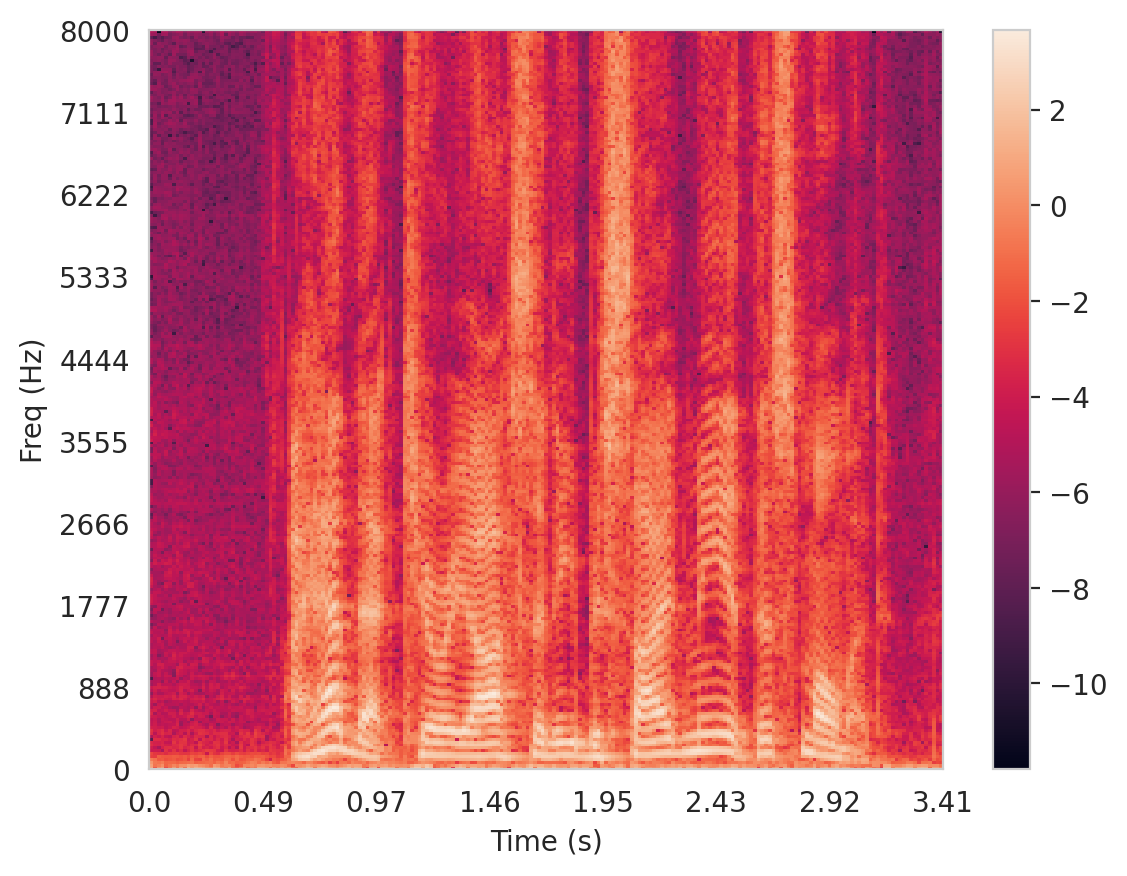

In [25]:
pc = plt.pcolormesh(torch.log(magnitude[0]))
plt.colorbar(pc)
yticks = np.linspace(0, magnitude.shape[-2], num=10)
ytext = sr / 2 / magnitude.shape[-2] * yticks
ytext = ytext.astype(int)
plt.yticks(yticks, ytext)

xticks = np.linspace(0, magnitude.shape[-1], num=8)
xtext = xticks * STFT_CONFIG["hop_length"] / sr
xtext = xtext.round(2)
plt.xticks(xticks, xtext)

plt.xlabel("Time (s)")
plt.ylabel("Freq (Hz)")

The noise can be also seen from STFT representation:

In [26]:
white_noise = torch.randn_like(speech)
white_noise = white_noise / white_noise.abs().max()
display.Audio(white_noise, rate=sr)

In [27]:
noisy_speech = speech + 0.2 * white_noise
noisy_speech = noisy_speech / noisy_speech.abs().max()
display.Audio(noisy_speech, rate=sr)

Text(0, 0.5, 'Freq (Hz)')

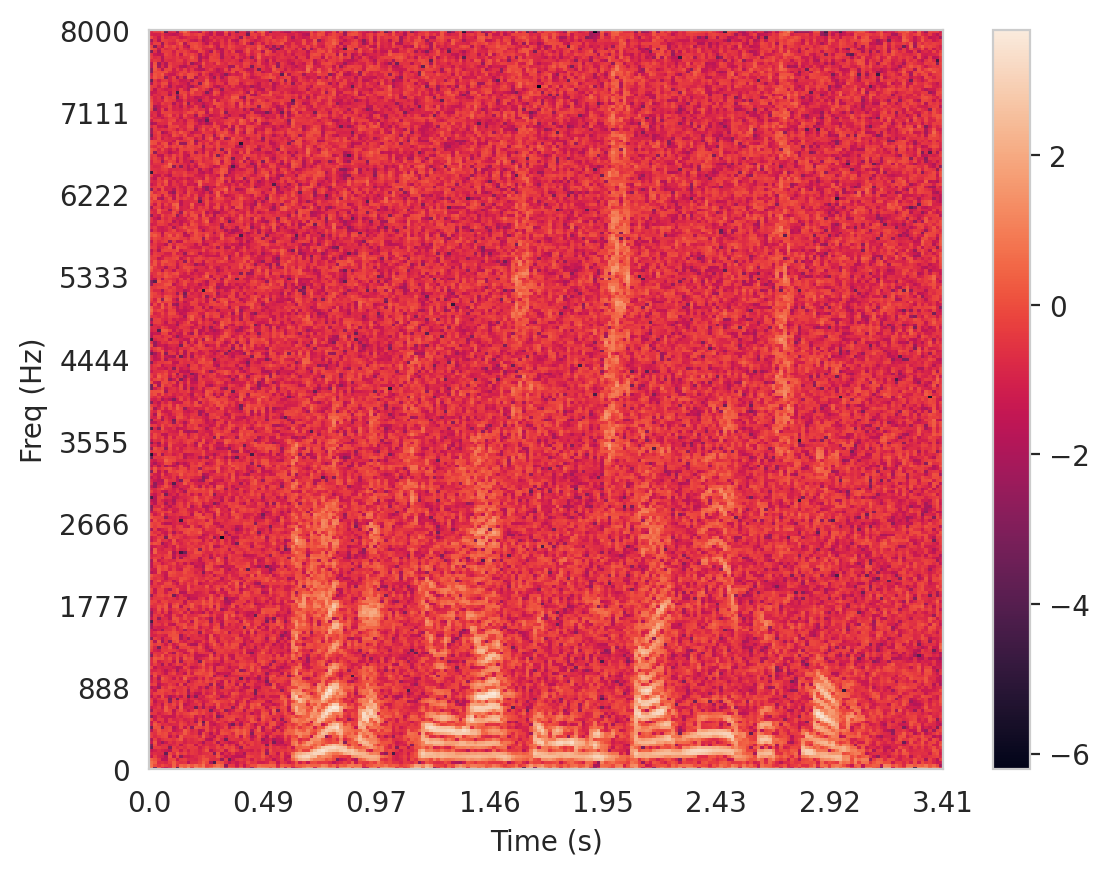

In [28]:
stft_noisy_speech = STFT(noisy_speech)
noisy_magnitude = stft_noisy_speech.abs()

pc = plt.pcolormesh(torch.log(noisy_magnitude[0]))
plt.colorbar(pc)
yticks = np.linspace(0, magnitude.shape[-2], num=10)
ytext = sr / 2 / magnitude.shape[-2] * yticks
ytext = ytext.astype(int)
plt.yticks(yticks, ytext)

xticks = np.linspace(0, magnitude.shape[-1], num=8)
xtext = xticks * STFT_CONFIG["hop_length"] / sr
xtext = xtext.round(2)
plt.xticks(xticks, xtext)

plt.xlabel("Time (s)")
plt.ylabel("Freq (Hz)")

The good thing about STFT is that this is lossless transform that can be **invertible** (given proper window and hop length that satisfy NOLA constraint: check [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) and [here](https://www.temjournal.com/content/81/TEMJournalFebruary2019_56_64.pdf)).

In [29]:
ISTFT = torchaudio.transforms.InverseSpectrogram(
    n_fft=STFT_CONFIG["n_fft"],
    win_length=STFT_CONFIG["win_length"],
    hop_length=STFT_CONFIG["hop_length"],
    normalized=STFT_CONFIG["normalized"],
)

L_2 diff: 3.85759858545498e-06


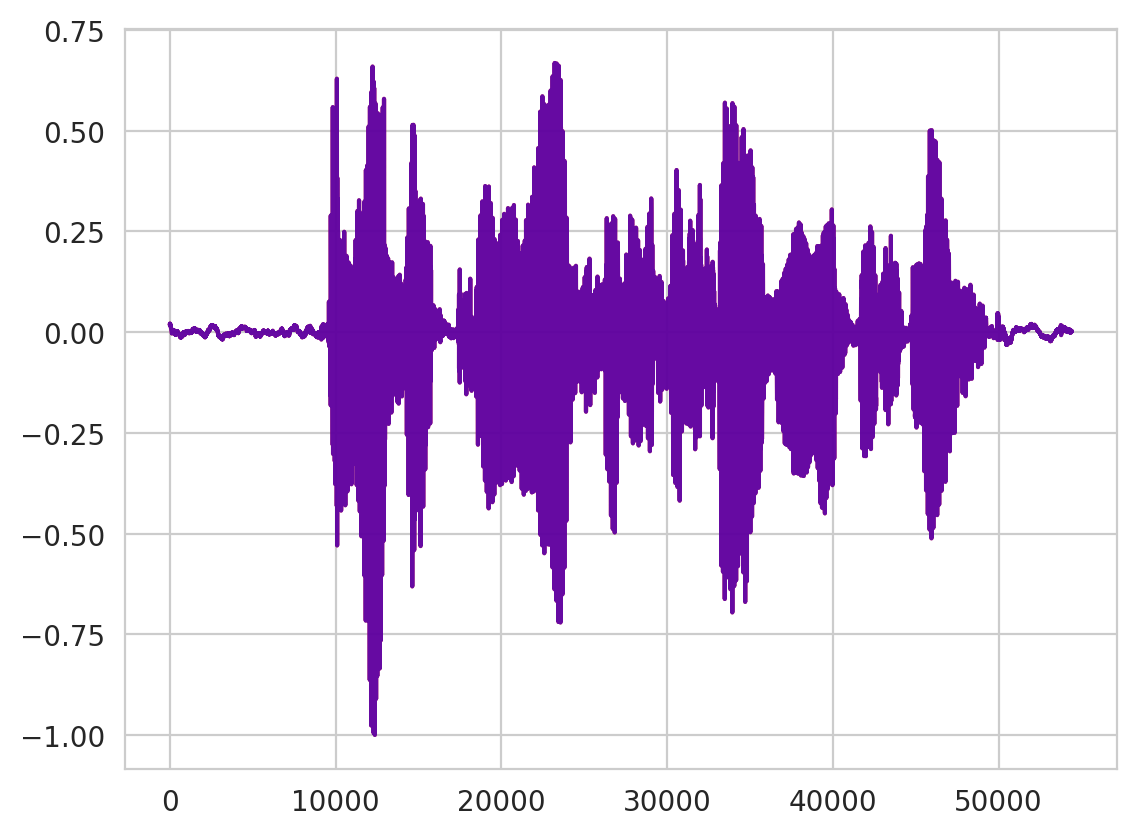

In [32]:
i_speech = ISTFT(stft_speech, length=speech.shape[-1])
print(f"L_2 diff: {torch.linalg.norm(speech-i_speech)}")
plt.plot(speech[0], color="red", alpha=0.9)
plt.plot(i_speech[0], color="blue", alpha=0.6)

MelSpectrogram, on the other hand, is **not invertible** because it compresses information with losses. That's why when TTS systems produce MelSpectrograms in the first part of the pipeline, we need Neural Vocoder to revert it back to raw audio.

In [33]:
MelSpec = torchaudio.transforms.MelSpectrogram(sample_rate=sr, n_mels=40,
                                               win_length=STFT_CONFIG["win_length"],
                                               hop_length=STFT_CONFIG["hop_length"],
                                               n_fft=STFT_CONFIG["n_fft"])

In [34]:
mel_stft = MelSpec(speech)

Text(0, 0.5, 'Freq (Hz)')

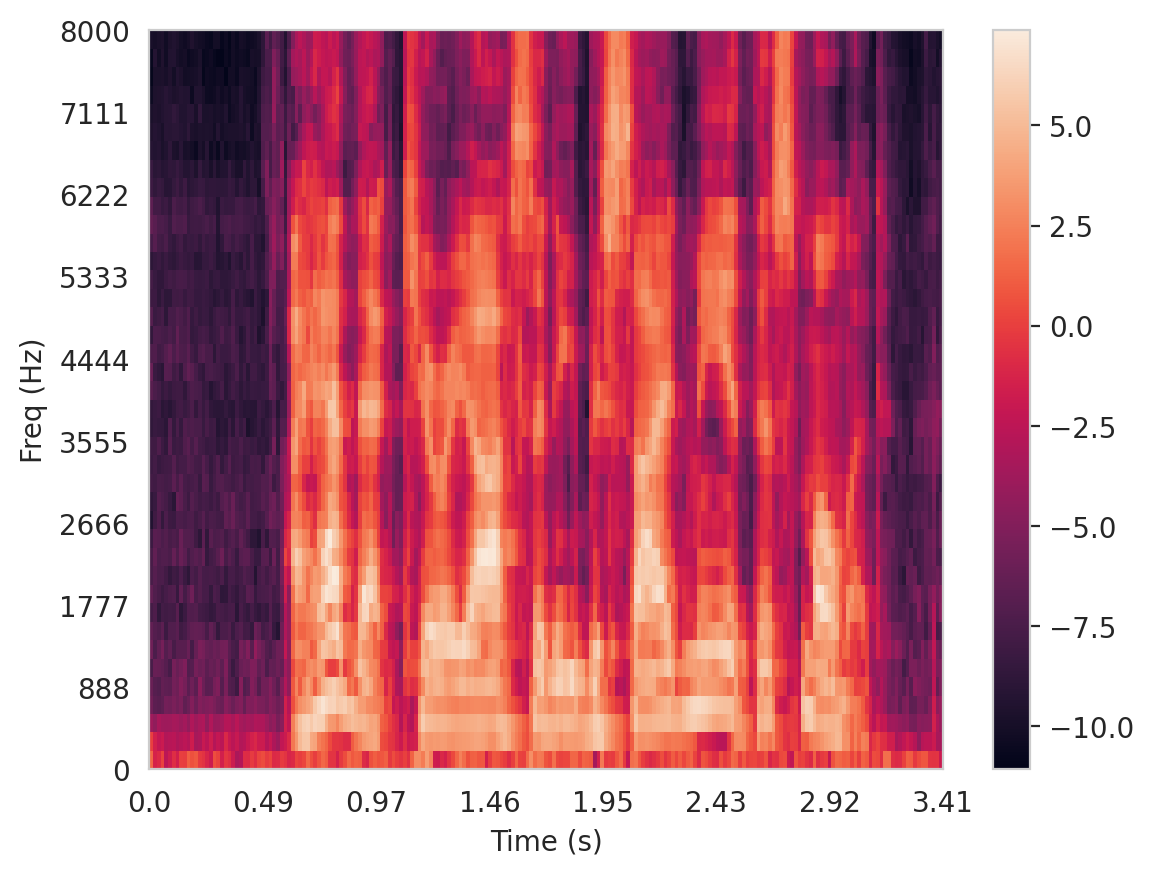

In [35]:
pc = plt.pcolormesh(torch.log(mel_stft[0]))
plt.colorbar(pc)
yticks = np.linspace(0, mel_stft.shape[-2], num=10)
ytext = (sr / 2 / mel_stft.shape[-2]) * yticks
ytext = ytext.astype(int)
plt.yticks(yticks, ytext)

xticks = np.linspace(0, mel_stft.shape[-1], num=8)
xtext = xticks * STFT_CONFIG["hop_length"] / sr
xtext = xtext.round(2)
plt.xticks(xticks, xtext)

plt.xlabel("Time (s)")
plt.ylabel("Freq (Hz)")

# Keyword Spotting Task

In [1]:
import dataclasses
import torch
from typing import Tuple, Union, List, Callable, Optional

@dataclasses.dataclass
class TaskConfig:
    keyword: str = 'sheila'  # We will use 1 key word -- 'sheila'
    batch_size: int = 128
    learning_rate: float = 3e-4
    weight_decay: float = 1e-5
    num_epochs: int = 20
    n_mels: int = 40
    cnn_out_channels: int = 8
    kernel_size: Tuple[int, int] = (5, 20)
    stride: Tuple[int, int] = (2, 8)
    hidden_size: int = 64
    gru_num_layers: int = 2
    bidirectional: bool = False
    num_classes: int = 2
    sample_rate: int = 16000
    device: torch.device = torch.device(
        'cuda:0' if torch.cuda.is_available() else 'cpu')

## Dataset

Given at utterance with a single word, we need to define whether this word is the **keyword** or something else -- binary classification task.

In [5]:
# !wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz -O speech_commands_v0.01.tar.gz
# !mkdir speech_commands && tar -C speech_commands -xvzf speech_commands_v0.01.tar.gz 1> log

In [6]:
from torch.utils.data import Dataset, DataLoader

In [7]:
import pandas as pd
from pathlib import Path
import json
from collections import OrderedDict

def read_json(fname):
    fname = Path(fname)
    with fname.open("rt") as handle:
        return json.load(handle, object_hook=OrderedDict)


def write_json(content, fname):
    fname = Path(fname)
    with fname.open("wt") as handle:
        json.dump(content, handle, indent=4, sort_keys=False)

In [11]:
class SpeechCommandDataset(Dataset):

    def __init__(
        self,
        transform: Optional[Callable] = None,
        path2dir: str = None,
        keywords: Union[str, List[str]] = None,
        csv: Optional[pd.DataFrame] = None,
        part: "str" = "train",
    ):        
        self.transform = transform

        self.path2dir = path2dir
        self.keywords = keywords
        self.index = self.create_or_load_index(part)

    def create_or_load_index(self, part):
        index_path = Path(f"{part}_index.json")
        
        if not index_path.exists():
            self.create_index(part)
            
        return read_json(index_path)

    def create_index(self, part):
        path2dir = Path(self.path2dir)
        keywords = self.keywords if isinstance(self.keywords, list) else [self.keywords]
        
        all_keywords = [
            p.stem for p in path2dir.glob('*')
            if p.is_dir() and not p.stem.startswith('_')
        ]

        index = []
        for keyword in all_keywords:
            paths = (path2dir / keyword).rglob('*.wav')
            if keyword in keywords:
                for path2wav in paths:
                    index.append({
                        "path": path2wav.as_posix(),
                        "keyword": keyword,
                        "label": 1
                    })
            else:
                for path2wav in paths:
                    index.append({
                        "path": path2wav.as_posix(),
                        "keyword": keyword,
                        "label": 0
                    })

        torch.manual_seed(0)
        indexes = torch.randperm(len(index))
        train_indexes = indexes[:int(len(index) * 0.8)]
        val_indexes = indexes[int(len(index) * 0.8):]

        train_index = [index[i] for i in train_indexes]
        val_index = [index[i] for i in val_indexes]

        train_index_path = Path("train_index.json")
        write_json(train_index, str(train_index_path))
        
        val_index_path = Path("val_index.json")
        write_json(val_index, str(val_index_path))

    def __getitem__(self, ind: int):
        instance = self.index[ind]

        path2wav = instance['path']
        wav, sr = torchaudio.load(path2wav)
        wav = wav.sum(dim=0)
        
        if self.transform:
            wav = self.transform(wav)

        return {
            'wav': wav,
            'keywors': instance['keyword'],
            'label': instance['label']
        }

    def __len__(self):
        return len(self.index)


## Augmentations

In audio, there exist many different augmentations:

* Pitch Shift
* Time Stretch
* Adding Random Noise or Noise from File (rain, music, background speech, etc.)
* Reverberations (synthesized or from real Room Impulse Responses)
* [SpecAugment](https://arxiv.org/abs/1904.08779): masking some of the time \ frequency intervals
* Filtering, changing the volume, and many more 

In [12]:
import torchaudio

class AugsCreation:

    def __init__(self):
        self.background_noises = [
            'speech_commands/_background_noise_/white_noise.wav',
            'speech_commands/_background_noise_/dude_miaowing.wav',
            'speech_commands/_background_noise_/doing_the_dishes.wav',
            'speech_commands/_background_noise_/exercise_bike.wav',
            'speech_commands/_background_noise_/pink_noise.wav',
            'speech_commands/_background_noise_/running_tap.wav'
        ]

        self.noises = [
            torchaudio.load(p)[0].squeeze()
            for p in self.background_noises
        ]

    def add_rand_noise(self, audio):

        # randomly choose noise
        noise_num = torch.randint(low=0, high=len(
            self.background_noises), size=(1,)).item()
        noise = self.noises[noise_num]

        noise_level = torch.Tensor([1])  # [0, 40]

        noise_energy = torch.norm(noise)
        audio_energy = torch.norm(audio)
        alpha = (audio_energy / noise_energy) * \
            torch.pow(10, -noise_level / 20)

        start = torch.randint(
            low=0,
            high=max(int(noise.size(0) - audio.size(0) - 1), 1),
            size=(1,)
        ).item()
        noise_sample = noise[start: start + audio.size(0)]

        audio_new = audio + alpha * noise_sample
        audio_new.clamp_(-1, 1)
        return audio_new

    def __call__(self, wav):
        aug_num = torch.randint(low=0, high=4, size=(1,)).item()   # choose 1 random aug from augs
        augs = [
            lambda x: x,
            lambda x: (x + torch.distributions.Normal(0, 0.01).sample(x.size())).clamp_(-1, 1),
            lambda x: torchaudio.transforms.Vol(.25)(x),
            lambda x: self.add_rand_noise(x)
        ]

        return augs[aug_num](wav)

In [13]:
train_dataset = SpeechCommandDataset(
    path2dir='speech_commands', keywords=TaskConfig.keyword, part="train", transform=AugsCreation()
)
val_dataset = SpeechCommandDataset(
    path2dir='speech_commands', keywords=TaskConfig.keyword, part="val"
)

In [14]:
train_dataset.index[:2]

[OrderedDict([('path', 'speech_commands/nine/7c75a504_nohash_1.wav'),
              ('keyword', 'nine'),
              ('label', 0)]),
 OrderedDict([('path', 'speech_commands/marvin/f9af823e_nohash_1.wav'),
              ('keyword', 'marvin'),
              ('label', 0)])]

## Collate Fn

In audio, it is usual that waveforms are of different length. However, to concatenate several tensors into a single batch, `PyTorch` requires all these tensors to have the **equal** shape. 

Therefore, we need to **pad** or **crop** (depending on the purpose and task) each utterance within the batch, so they all will have the same length.

We can do it in `__getitem__` inside dataset if we want to set all utterances to the **fixed** length across the dataset. If we only need equal sizes **within** the batch, we can use `torch.nn.utils.rnn.pad_sequence` method or write it ourselves.

To tell `PyTorch` how to combine utterances in a single batch, we use `collate_fn` argument for the `DataLoader`. Given list of `__getitem__` outputs, we need to define how to combine them:

In [15]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(data):
    wavs = []
    labels = []    

    for el in data:
        wavs.append(el['wav'])
        labels.append(el['label'])

    # torch.nn.utils.rnn.pad_sequence takes list(Tensors) and returns padded (with 0.0) Tensor
    wavs = pad_sequence(wavs, batch_first=True)    
    labels = torch.Tensor(labels).long()
    return wavs, labels

## DataLoader

In [16]:
train_dataloader = DataLoader(train_dataset, batch_size=TaskConfig.batch_size,
                          shuffle=False, collate_fn=collate_fn, # We pass our collate_fn here
                          num_workers=2, pin_memory=True)

val_dataloader = DataLoader(val_dataset, batch_size=TaskConfig.batch_size,
                        shuffle=False, collate_fn=collate_fn,
                        num_workers=2, pin_memory=True)

## Model

As we discussed in class, working with a waveform might be computationally expensive and it might be harder for models to obtain useful frequency-wise features. So a lot of models in Audio domain work with Time-Frequency representations like STFT, MelSpectrogram, LFCC, MFCC, etc.

**Remark:** there are still a lot of models that work directly with **raw** audio (waveform) and achieve state-of-the-art performance in many tasks. 

In [17]:
from torch import nn

So here we will work with MelSpectrogram (log version). To improve the speed, we can use `torchaudio` implementation that can work directly on **GPU**.

In this example, we also apply SpecAugment augmentation. Note that we do it inside the model, not in the dataset as usual. This is because we want to improve the speed and apply augmentation on GPU and directly on the whole batch.

In [18]:
class LogMelspec(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.melspec = torchaudio.transforms.MelSpectrogram(
                sample_rate=config.sample_rate,
                n_fft=400,
                win_length=400,
                hop_length=160,
                n_mels=config.n_mels
        )

        self.spec_augs = nn.Sequential(
                torchaudio.transforms.FrequencyMasking(freq_mask_param=15),
                torchaudio.transforms.TimeMasking(time_mask_param=35),
        )


    def __call__(self, batch):
        x = torch.log(self.melspec(batch).clamp_(min=1e-9, max=1e9))
        if self.training:
            x = self.spec_augs(x)
        return x

Then we define [CRNN](https://arxiv.org/pdf/1703.05390)-like model. Note that GRU (and other RNN-like modules) return tensor of size $B\times T \times H$, where $H$ is the hidden representation size. One common approach for using RNN output is to use just the **last** timestep: `output = gru_output[:, -1, ;]`. However, other methods exist:

* Average pooling: taking the average across $T$
* Attentive statistics pooling: taking weighted average across T where weights are calculated by measuring the importance of each timestep
* And many more

In this example, we show Attentive pooling method. The importance of each timestep is calculated with MLP, then the softmax operation is done to define weights for the sum. The output is the average of timesteps using these weights.

In [24]:
class Attention(nn.Module):

    def __init__(self, hidden_size: int):
        super().__init__()

        self.energy = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, 1)
        )
    
    def forward(self, input):
        energy = self.energy(input)
        alpha = torch.softmax(energy, dim=-2)
        return (input * alpha).sum(dim=-2)

class CRNN(nn.Module):

    def __init__(self, config: TaskConfig):
        super().__init__()
        self.config = config

        self.mel_spec = LogMelspec(config)

        self.conv = nn.Sequential(
            nn.Conv2d(
                in_channels=1, out_channels=config.cnn_out_channels,
                kernel_size=config.kernel_size, stride=config.stride
            ),
            nn.Flatten(start_dim=1, end_dim=2),
        )

        self.conv_out_frequency = (config.n_mels - config.kernel_size[0]) // \
            config.stride[0] + 1
        
        self.gru = nn.GRU(
            input_size=self.conv_out_frequency * config.cnn_out_channels,
            hidden_size=config.hidden_size,
            num_layers=config.gru_num_layers,
            dropout=0.1,
            bidirectional=config.bidirectional,
            batch_first=True
        )

        self.attention = Attention(config.hidden_size)
        self.classifier = nn.Linear(config.hidden_size, config.num_classes)
    
    def forward(self, input):
        input = self.mel_spec(input)
        
        input = input.unsqueeze(dim=1)
        conv_output = self.conv(input).transpose(-1, -2)
        gru_output, _ = self.gru(conv_output)
        context_vector = self.attention(gru_output)
        output = self.classifier(context_vector)
        return output

config = TaskConfig()
model = CRNN(config)
model

CRNN(
  (mel_spec): LogMelspec(
    (melspec): MelSpectrogram(
      (spectrogram): Spectrogram()
      (mel_scale): MelScale()
    )
    (spec_augs): Sequential(
      (0): FrequencyMasking()
      (1): TimeMasking()
    )
  )
  (conv): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 20), stride=(2, 8))
    (1): Flatten(start_dim=1, end_dim=2)
  )
  (gru): GRU(144, 64, num_layers=2, batch_first=True, dropout=0.1)
  (attention): Attention(
    (energy): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=1, bias=True)
    )
  )
  (classifier): Linear(in_features=64, out_features=2, bias=True)
)

In [25]:
model(train_dataset[0]["wav"].unsqueeze(0))

tensor([[0.0338, 0.1778]], grad_fn=<AddmmBackward0>)

## Training pipeline

In [36]:
from tqdm.auto import tqdm
import wandb

wandb.login()

In [16]:
criterion = nn.CrossEntropyLoss()

In [17]:
# FA - true: 0, model: 1
# FR - true: 1, model: 0

def count_fa(preds, labels):
    preds = torch.argmax(preds, dim=-1)

    FA = torch.sum(preds[labels == 0])
    
    # torch.numel - returns total number of elements in tensor
    return FA.item() / torch.numel(preds)

def count_fr(preds, labels):
    preds = torch.argmax(preds, dim=-1)

    FR = torch.sum(labels[preds == 0])
    
    # torch.numel - returns total number of elements in tensor
    return FR.item() / torch.numel(preds)

def count_acc(preds, labels):
    preds = torch.argmax(preds, dim=-1)

    acc = torch.sum(preds == labels)
    
    # torch.numel - returns total number of elements in tensor
    return acc.item() / torch.numel(preds)

In [18]:
def train_one_epoch(model, dataloader, criterion, optimizer, scheduler, device, epoch):
    model.train()

    avg_loss = 0
    step = epoch * len(dataloader)
    for batch_idx, (wav, label) in tqdm(enumerate(dataloader), total=len(dataloader)):
        wav, label = wav.to(device), label.to(device)

        preds = model(wav)
        loss = criterion(preds, label)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()

        avg_loss += loss.item()
        
        wandb.log({
            "train_step_loss": loss.item(),
            "lr": scheduler.get_last_lr()[0], # get current lr for the 0th param group
            "acc_step": count_acc(preds, label),
            "fa_step": count_fa(preds, label),
            "fr_step": count_fr(preds, label),
        }, step=step + batch_idx)

        if batch_idx == 0:        
            wandb.log({"train_image": wandb.Audio(wav[0].detach().cpu().numpy(), sample_rate=16000,
                                                  caption=f"Label: {label[0]}, Pred: {preds[0].argmax(-1)}")},
                      step=step+batch_idx)

    avg_loss = avg_loss / (batch_idx + 1)
    return avg_loss


def evaluate(model, dataloader, criterion, device):
    model.eval()

    avg_loss = 0
    accuracy = 0
    fa = 0
    fr = 0
    total_elements = 0
    for batch_idx, (wav, label) in enumerate(dataloader):
        wav, label = wav.to(device), label.to(device)

        preds = model(wav)
        loss = criterion(preds, label)

        accuracy += count_acc(preds, label)
        fa += count_fa(preds, label)
        fr += count_fr(preds, label)
        avg_loss += loss.item()
        

    avg_loss = avg_loss / (batch_idx + 1)
    accuracy = accuracy / (batch_idx + 1)
    fa = fa / (batch_idx + 1)
    fr = fr / (batch_idx + 1)

    return avg_loss, accuracy, fa, fr


def train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, device, n_epochs):

    train_avg_losses = []
    val_avg_losses = []
    val_accuracy_list = []

    for epoch in range(n_epochs):        
        train_avg_loss = train_one_epoch(model, train_dataloader, criterion, optimizer, scheduler, device, epoch)
        val_avg_loss, val_accuracy, val_fa, val_fr = evaluate(model, val_dataloader, criterion, device)

        wandb.log({
            "train_avg_loss": train_avg_loss, 
            "val_avg_loss": val_avg_loss,
            "val_accuracy": val_accuracy,
            "val_fa": val_fa,
            "val_fr": val_fr,
        }, step=(epoch + 1) * len(train_dataloader))

In [19]:
model.to(config.device)

NUM_EPOCHS = 2
optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS * len(train_dataloader), eta_min=1e-4)

In [ ]:
with wandb.init(
                project="seminar_wandb_kws", # project name
                name="crnn" # run name within the project
            ) as run:
    train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, config.device, NUM_EPOCHS)